In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split

In [4]:
mean1 = 55
std1 = 10
num_samples = 600

col1 = np.random.normal(mean1, std1, num_samples)
col1 = np.clip(col1, 30, 120)
clo1 = np.round(col1).astype(int)

mean2 = 18
std2 = 3

col2 = np.random.normal(mean2, std2, num_samples)
col2 = np.clip(col2, 12 ,26)
col2 = np.round(col2).astype(int)

col3 = np.random.randint(2, size =num_samples )
col3[col1 > mean1] = 1

data = {
    'Miles_Per_Week' : col1,
    'Farthest_Run' : col2,
    'Qualitied_Buston_marathon' : col3
}

df = pd.DataFrame(data)
df.head()

,Miles_Per_Week,Farthest_Run,Qualitied_Buston_marathon
0,50.364144,19,0
1,64.177237,20,1
2,60.219956,19,1
3,53.170490,13,1
4,50.604107,16,1


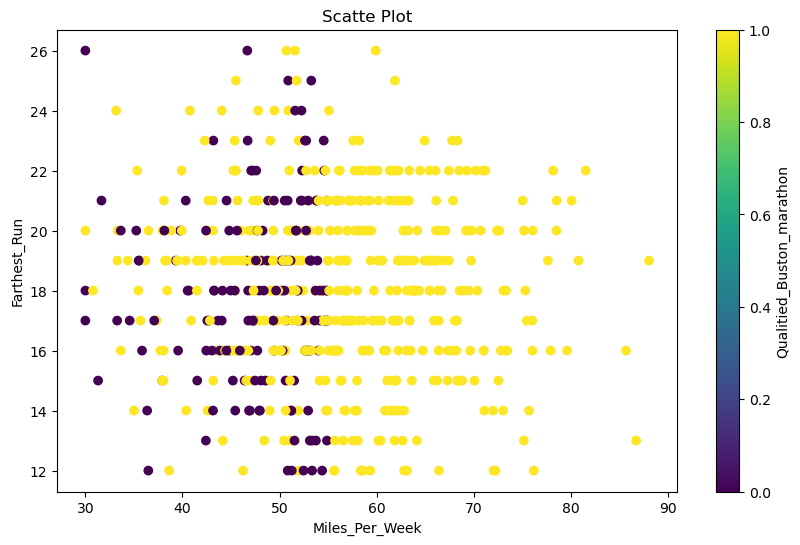

In [6]:
plt.figure(figsize = (10, 6))
plt.scatter(df['Miles_Per_Week'], df['Farthest_Run'], c = df['Qualitied_Buston_marathon'])
plt.title('Scatte Plot')
plt.xlabel('Miles_Per_Week')
plt.ylabel('Farthest_Run')
plt.colorbar(label = 'Qualitied_Buston_marathon')
plt.show()

In [9]:
X = df.iloc[: , 0:2]
X

,Miles_Per_Week,Farthest_Run
0,50.364144,19
1,64.177237,20
2,60.219956,19
3,53.170490,13
4,50.604107,16
...,...,...
595,56.104418,22
596,48.410983,17
597,69.495090,18
598,49.350442,16


In [14]:
y = df.iloc[:, 2]
y

0      0
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Qualitied_Buston_marathon, Length: 600, dtype: int32

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((480, 2), (480,), (120, 2), (120,))

In [22]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [25]:
model.score(X_test, y_test)*100

75.0

In [29]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Regularization

In [31]:
model0 = SVC(C = 0.1)
model0.fit(X_train, y_train)
model0.score(X_test, y_test)

0.75

In [33]:
model1 = SVC(C = 1)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.75

In [35]:
model2 = SVC(C = 1000)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.7416666666666667

# Gamma

In [37]:
model_g = SVC(gamma = 0.1)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.75

In [38]:
model_g1 = SVC(gamma = 1)
model_g1.fit(X_train, y_train)
model_g1.score(X_test, y_test)

0.725

In [41]:
model_g2 = SVC(gamma = 10)
model_g2.fit(X_train, y_train)
model_g2.score(X_test, y_test)

0.7666666666666667

# Kernals

In [44]:
model_k = SVC(kernel = 'linear')
model_k.fit(X_train, y_train)
model_k.score(X_test, y_test)

0.75

In [45]:
model_k1 = SVC(kernel = 'rbf')
model_k1.fit(X_train, y_train)
model_k1.score(X_test, y_test)

0.75